# **Wheat Production and Global Pricing Dynamics**

**Authors**: Matthew Ocampo, Sam Sims, Judith Haryanto, Sant Sumetpong

## **Introduction**

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import linear_model

Changes in food prices depend on changes in input costs. It’s not the only factor of course (i.e., climate, economic stability, changes in demand, changes in demand/supply of substitutes or complements, etc). As such, should there be changes in input costs, we would expect to see changes in food prices. The research question we’re interested in the temporal relationship between changes in input costs with changes in food prices with time progression. We will be investigating the relationship between oil prices wheat prices while controlling for other factors such as climate and the cost of other inputs like fertilizer and pesticides. The findings could contribute towards greater understanding of how food prices fluctuate based of off oil prices, specifically how much do changes in oil prices affect food prices. This will be useful in informing macroeconomic policies and international relations since not only are oil and wheat commodities in most – if not all – countries, but the price increase in these goods also tend to be act as inflationary pressure to the local economy.

For this project, our group proposes to examine the prices of inputs in agricultural activity and how the fluctuating prices affects the end cost of wheat.

This project will require combining and cleaning datasets, visualizing trends in data as well as mapping of sources of wheat, and input time lag with regression.

## Hypothesis

We hypothesize that oil prices may be more closely correlated with wheat prices than other inputs. This is due to numerous potential reasons:


i) Delayed information on price changes and subsequent changes in economic activities across the supply chain and across levels of production

ii) Farmers purchase oil at a set price through contracts on numerous occasions during the year, thus are incentivized to form purchase contracts when prices are low.

iii) The global wheat market, even though it is not concentrated, peak production happens when the Northern hemisphere experiences summer and fall. Therefore changes in oil prices may not impact wheat prices when production is low.

## Methodology

We decided to use US data for our analyses because not only are there a lot of datasets being publicly available, but also because US is one of the largest global producers and exporters of wheat. Our analyses is restricted to monthly data from January 1990 to February 2024, just after massive technological changes and large scale farming become increasingly adopted starting from 1970s. Monthly wheat prices, oil prices (West Texas Intermediary pricing), seed prices, machinery prices, are obtained from the Federal Reserve Economic Data (FRED). Climate data (i.e., monthly precipitation) were obtained from the National Oceanic and Atmospheric Administration (NOAA). Information on US minimum wage and wages of farm labourers were obtained from the US Department of Agriculture (USDA) and the US Bureau of Labour Statistics.

We then plotted numerous variables alongside one another to visualized how the movements of one variable changes relative to another - supplementing these graphs with correlation coefficients to see how two variables are closely correlated to one another.

Finally, we will regress oil prices as our treatment variable, other inputs as controlled variables, versus wheat prices as the outcome variable to form a time-series regression model. Oil prices will be lagged behind wheat prices using various time lags to check whether there's greater fit.

## The Data

PCU325311325311-4.csv is Producer Price Index by Industry: Nitrogenous Fertilizer Manufacturing: Urea (DISCONTINUED)

WTISPLC is the price of oil by West Texas Intermediary

WPUSI024011 is the Producer Price Index by Commodity: Special Indexes: Agricultural Machinery, Including Tractors

PWHEAMTUSDM is the Global price of Wheat

farm_wage_data_99t22 is the farm wage data from USDA.

Pesticide2003 is pesticade data from 2003.

PCU3253203253201 is pesticide data from Producer Price Index by Industry: Pesticide and Other Agricultural Chemical Manufacturing: Agricultural and Commercial Pesticides and Chemicals FRED

seeds is seed prices from USDA

weather data from NOAA

wheat production

## **Analysis**

We begin with a pie chart depicting resource use in the production of wheat.

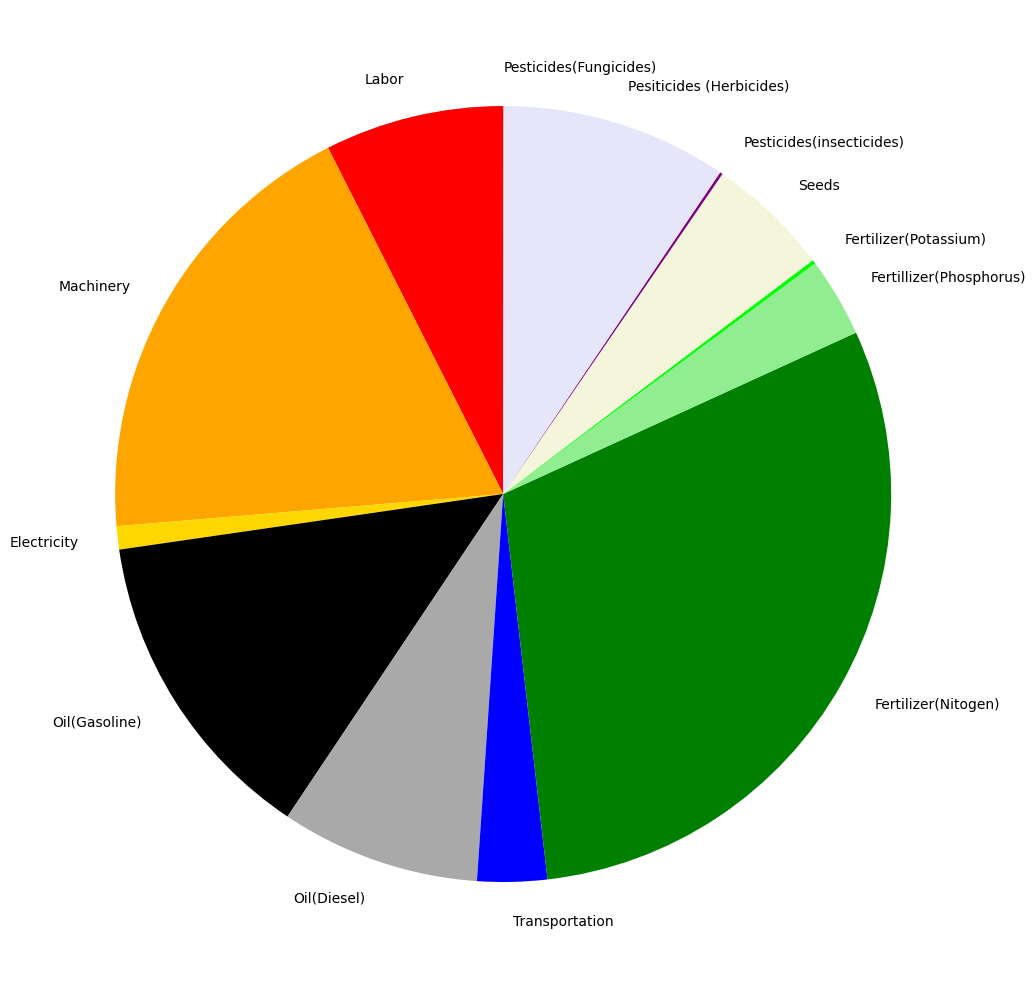

In [50]:
plt.rcParams["figure.figsize"] = [25, 10]

y = np.array([316000, 800000, 41000, 565000, 352000, 123000, 1272000, 140000, 7000, 218000, 5000, 400000, 400, ])
mylabels = ['Labor', 'Machinery', 'Electricity','Oil(Gasoline)', 'Oil(Diesel)','Transportation', 'Fertilizer(Nitogen)', 'Fertillizer(Phosphorus)','Fertilizer(Potassium)','Seeds','Pesticides(insecticides)', 'Pesiticides (Herbicides)','Pesticides(Fungicides)']
mycolors = ["red", "orange", 'gold', 'black','darkgrey','blue','green','lightgreen','lime','beige','purple','lavender', 'brown' ]

plt.pie(y, labels = mylabels, startangle = 90, colors=mycolors)
plt.show() 

The data from the pie chart comes from Amenumey, S.E., Capel, P.D. Fertilizer Consumption and Energy Input for 16 Crops in the United States.Nat Resour Res 23, 299–309 (2014) who referenced Pimentel, D. (2006). Impacts of organic farming on the efficiency of energy use in agriculture. Washington, DC: The Organic Center 40 p. 

The input chart represents the importance of each input into the production of wheat. It is unsurprising that the three largest inputs into wheat production, making up 73.8% of the total, include Fertilizers (33.3%), Oil (21.6%) and Machinery (18.9%). 

This influence our decision to not correlate our wheat data with inputs like electricity, labour and transportation and focus more heavily on inputs that had larger and more globally orientated data sets.

## Visualizations

We continue by creating visualizations that deomstrate relationships between input prices and wheat prices. We consider the following inputs and their prices: oil, fertilizer, agricultural machinery, pesticides and seeds for planting. We hoped these line plots would serve as early indicators of which input prices were highly correlated with wheat prices. We examine US prices for all inputs, with oil data being taken from the West Texas Intermediary. 

In [51]:
df1 = pd.read_csv('WTISPLC.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df1 = pd.merge(df1, df2)

merged_df1['DATE'] = pd.to_datetime(merged_df1['DATE'])
merged_df1 = merged_df1.set_index('DATE')

merged_df1.rename(columns={'WTISPLC': 'WTI', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df1.head()

,WTI,WHEAT (USD)
DATE,,
1990-01-01,22.641,167.918579
1990-02-01,22.108,160.937271
1990-03-01,20.418,156.528030
1990-04-01,18.582,159.467529
1990-05-01,18.237,149.179291


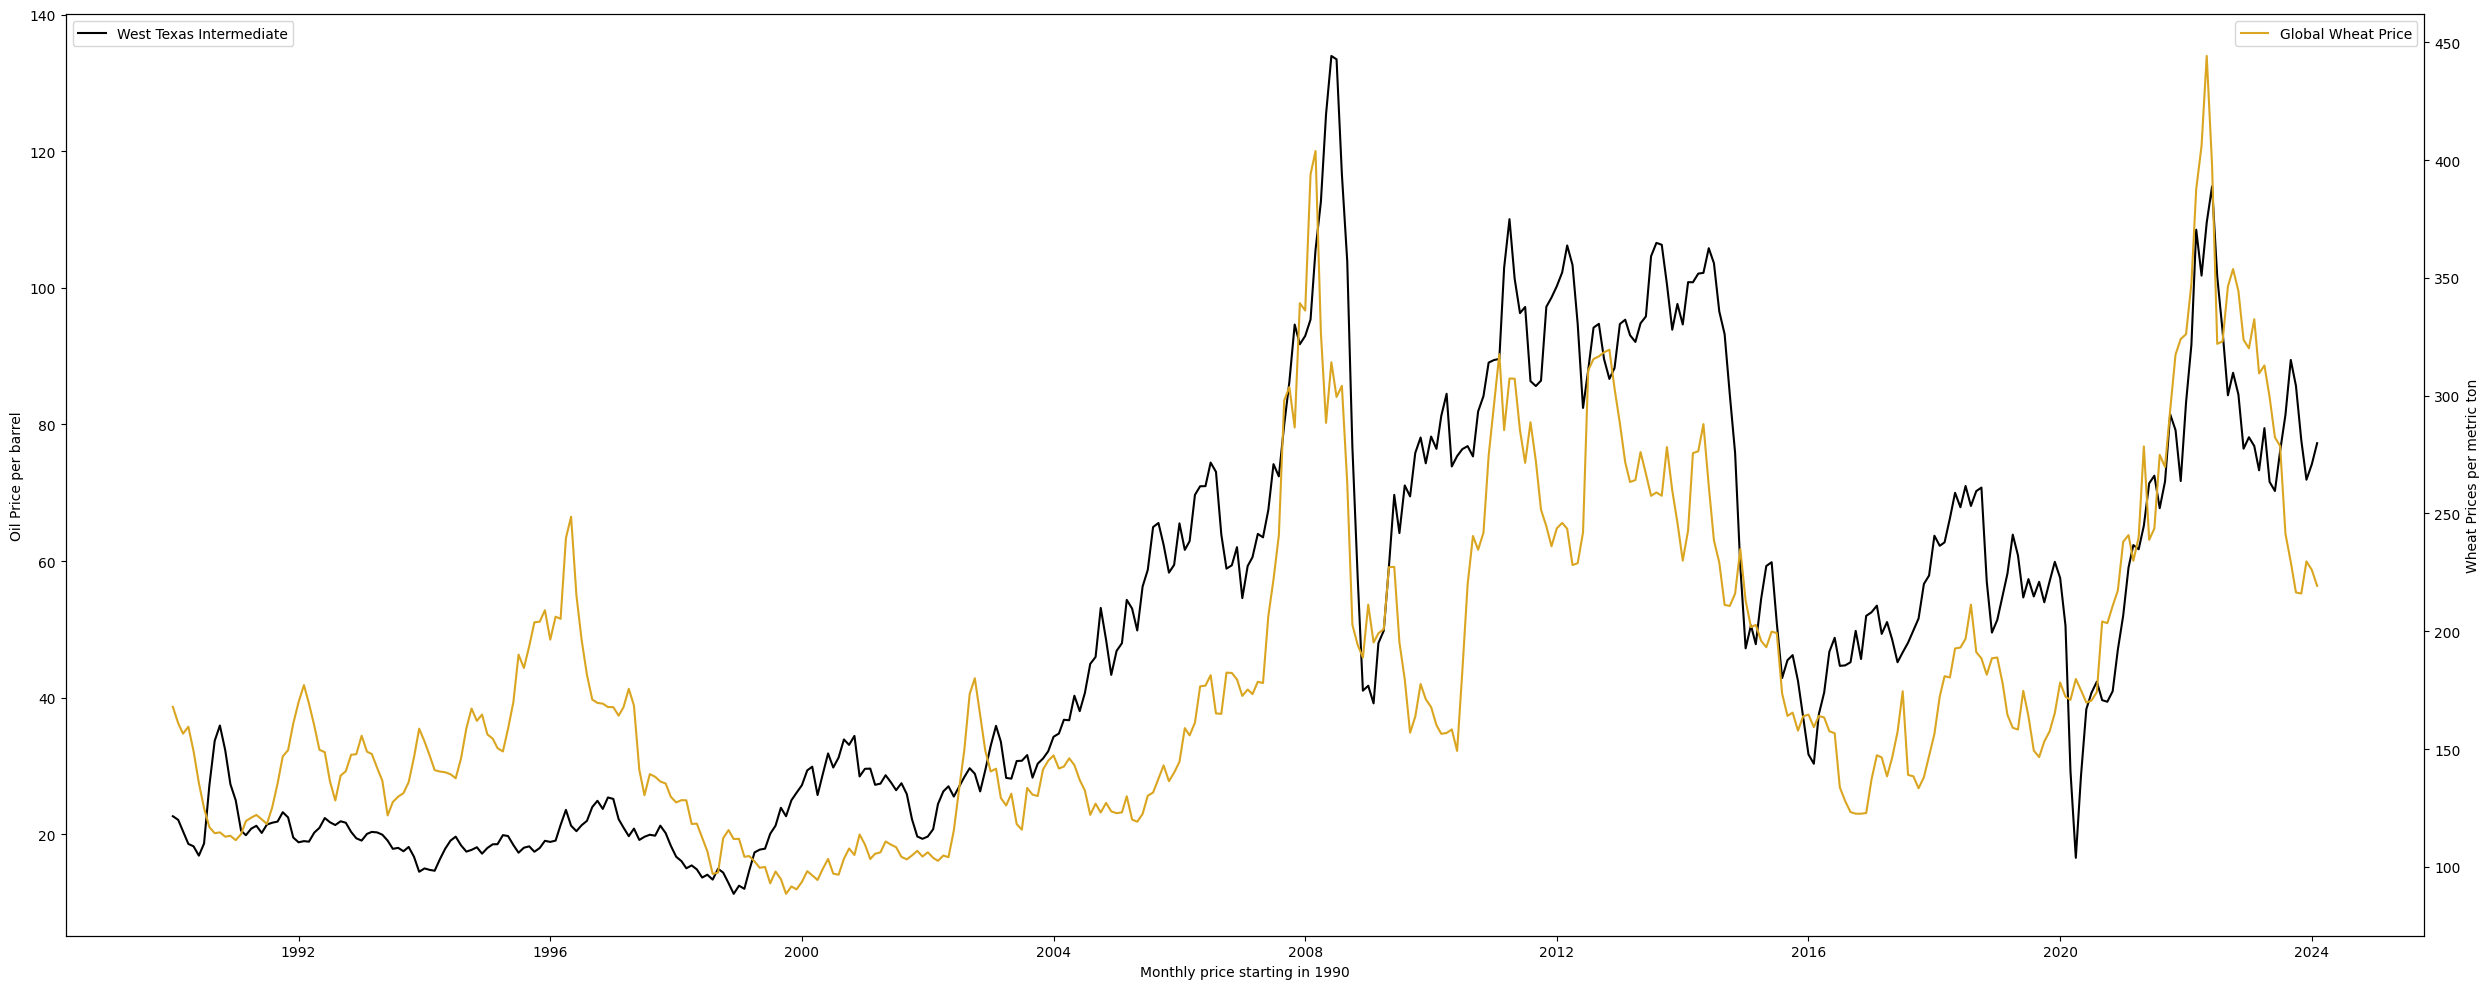

In [52]:
x = merged_df1.index
y1 = merged_df1['WTI']
y2 = merged_df1['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='black', label='West Texas Intermediate')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Oil Price per barrel', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = '#DAA520', label='Global Wheat Price')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [71]:
df1 = pd.read_csv('PCU325311325311.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df2 = pd.merge(df1, df2)

merged_df2['DATE'] = pd.to_datetime(merged_df2['DATE'])
merged_df2 = merged_df2.set_index('DATE')

merged_df2.rename(columns={'PCU325311325311': 'FERT', 'WTISPLC': 'WTI'}, inplace=True)
merged_df2.head()

,FERT,WTI
DATE,,
1990-01-01,114.4,22.641
1990-02-01,120.1,22.108
1990-03-01,119.6,20.418
1990-04-01,119.1,18.582
1990-05-01,115.8,18.237


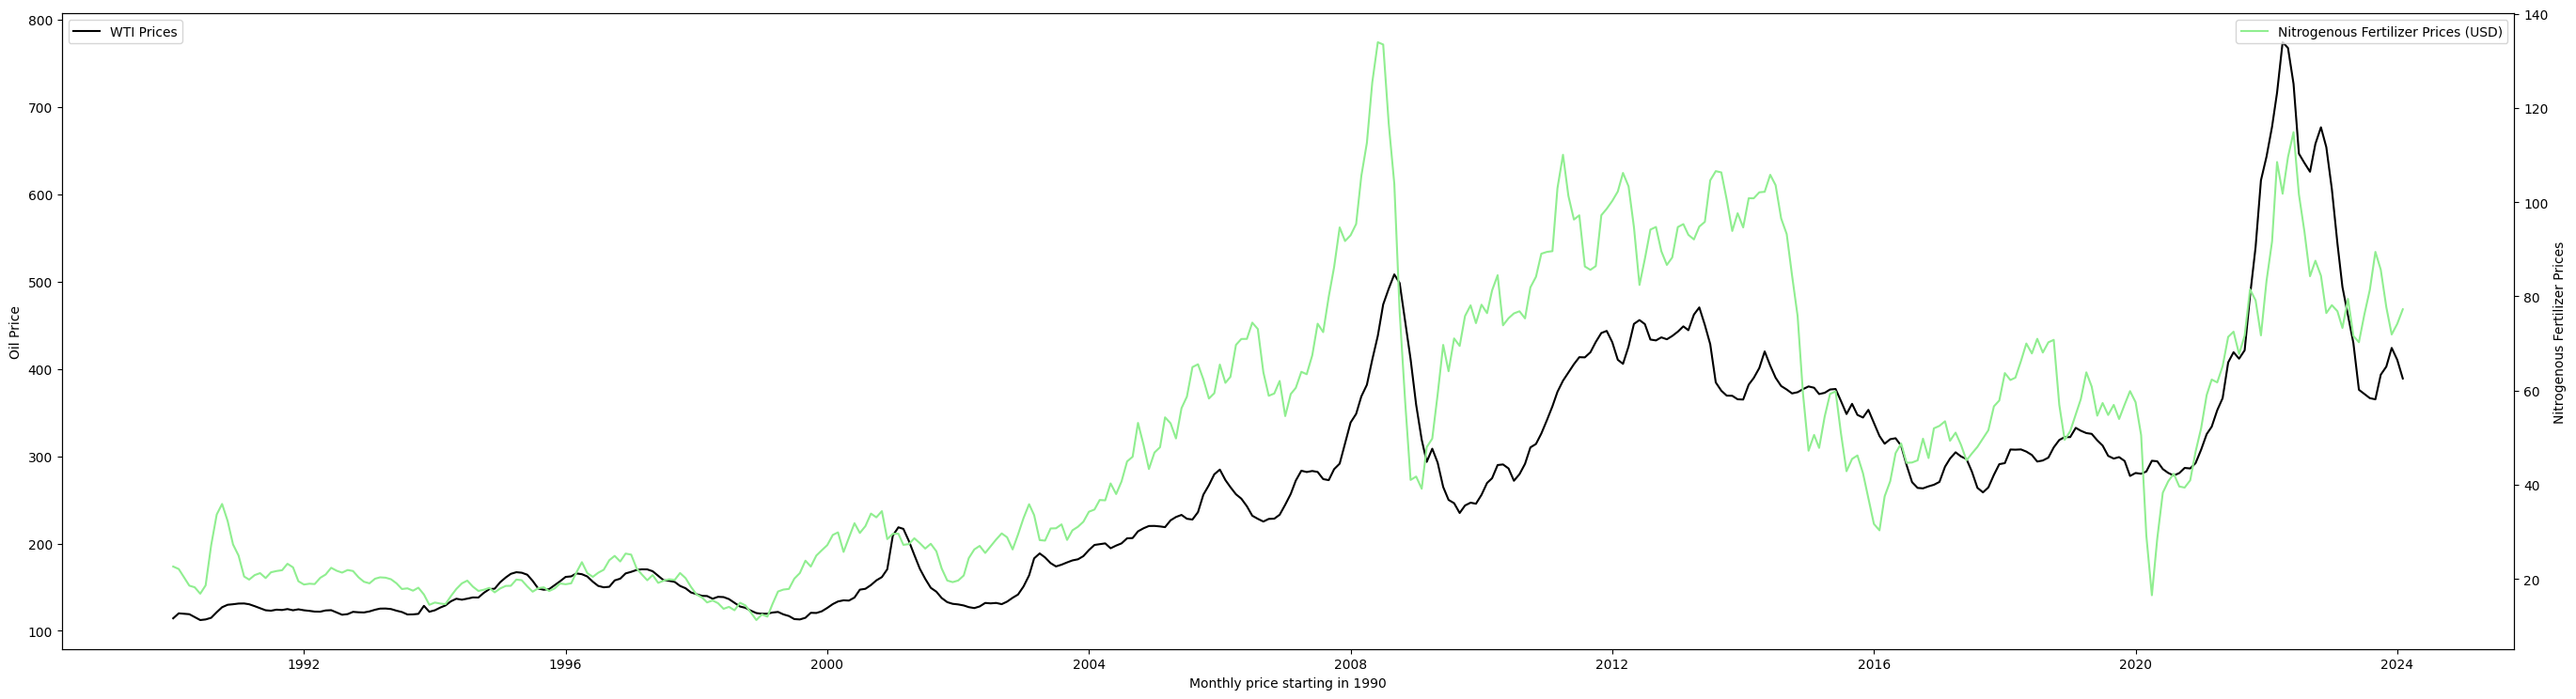

In [72]:
x = merged_df2.index
y1 = merged_df2['FERT']
y2 = merged_df2['WTI']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='black', label='WTI Prices')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Oil Price', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'lightgreen', label='Nitrogenous Fertilizer Prices (USD)') 
ax2.set_ylabel('Nitrogenous Fertilizer Prices', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [55]:
df1 = pd.read_csv('WPUSI024011.csv')
df2 = pd.read_csv('WTISPLC.csv')

merged_df3 = pd.merge(df1, df2)

merged_df3['DATE'] = pd.to_datetime(merged_df3['DATE'])
merged_df3 = merged_df3.set_index('DATE')

merged_df3.rename(columns={'WPUSI024011': 'AGRI MACH', 'WTISPLC': 'WTI'}, inplace=True)
merged_df3.head()

,AGRI MACH,WTI
DATE,,
1990-01-01,122.3,22.641
1990-02-01,122.4,22.108
1990-03-01,122.8,20.418
1990-04-01,123.2,18.582
1990-05-01,123.2,18.237


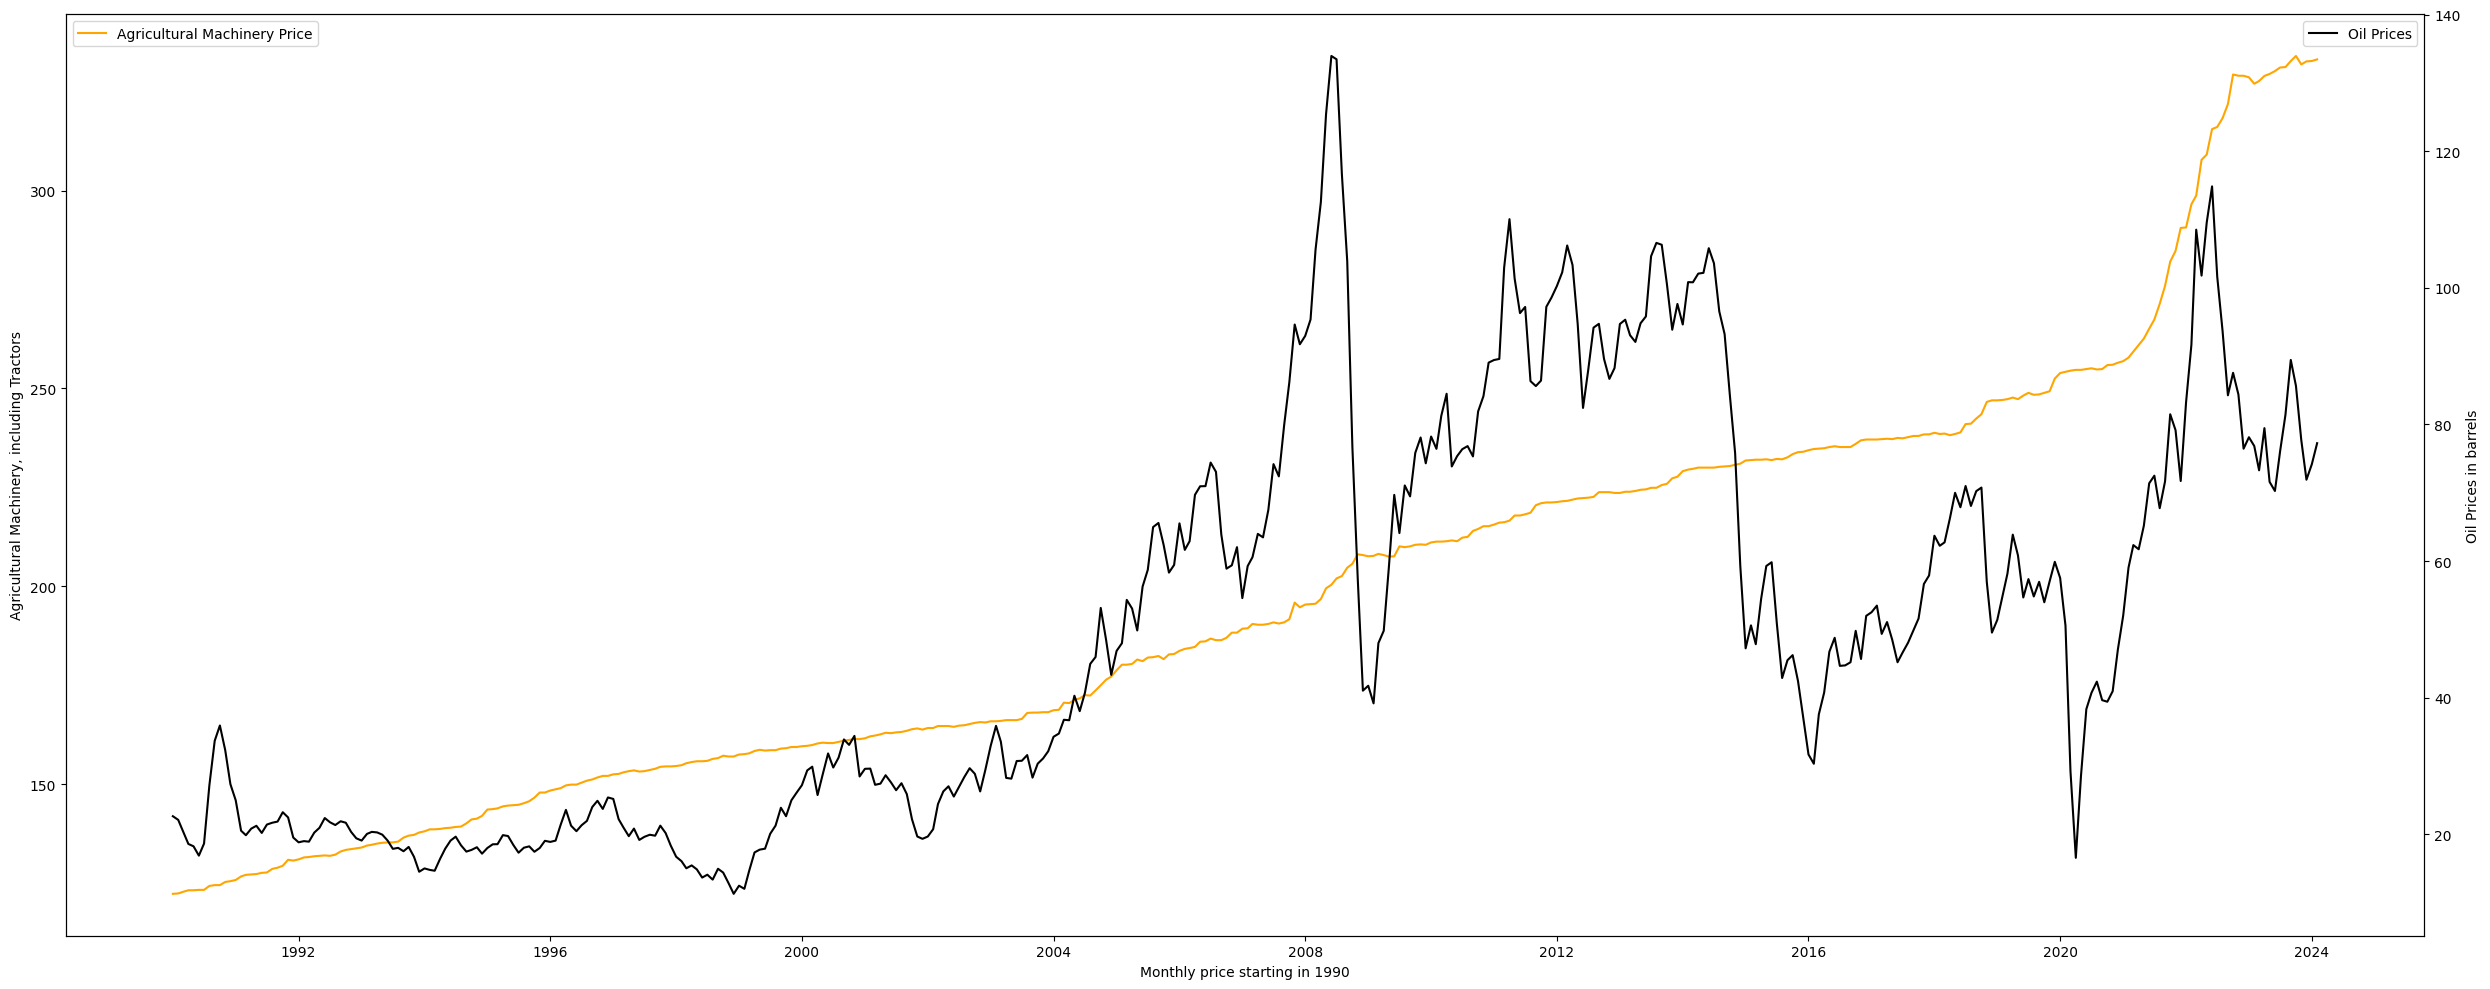

In [56]:
x = merged_df3.index
y1 = merged_df3['AGRI MACH']
y2 = merged_df3['WTI']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='orange', label='Agricultural Machinery Price')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Agricultural Machinery, including Tractors', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'black', label='Oil Prices')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Oil Prices in barrels', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [57]:
df1 = pd.read_csv('PCU325311325311.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')
merged_df4 = pd.merge(df1, df2)

merged_df4['DATE'] = pd.to_datetime(merged_df4['DATE'])
merged_df4 = merged_df4.set_index('DATE')

merged_df4.rename(columns={'PCU325311325311': 'FERT', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df4.head()

,FERT,WHEAT (USD)
DATE,,
1990-01-01,114.4,167.918579
1990-02-01,120.1,160.937271
1990-03-01,119.6,156.528030
1990-04-01,119.1,159.467529
1990-05-01,115.8,149.179291


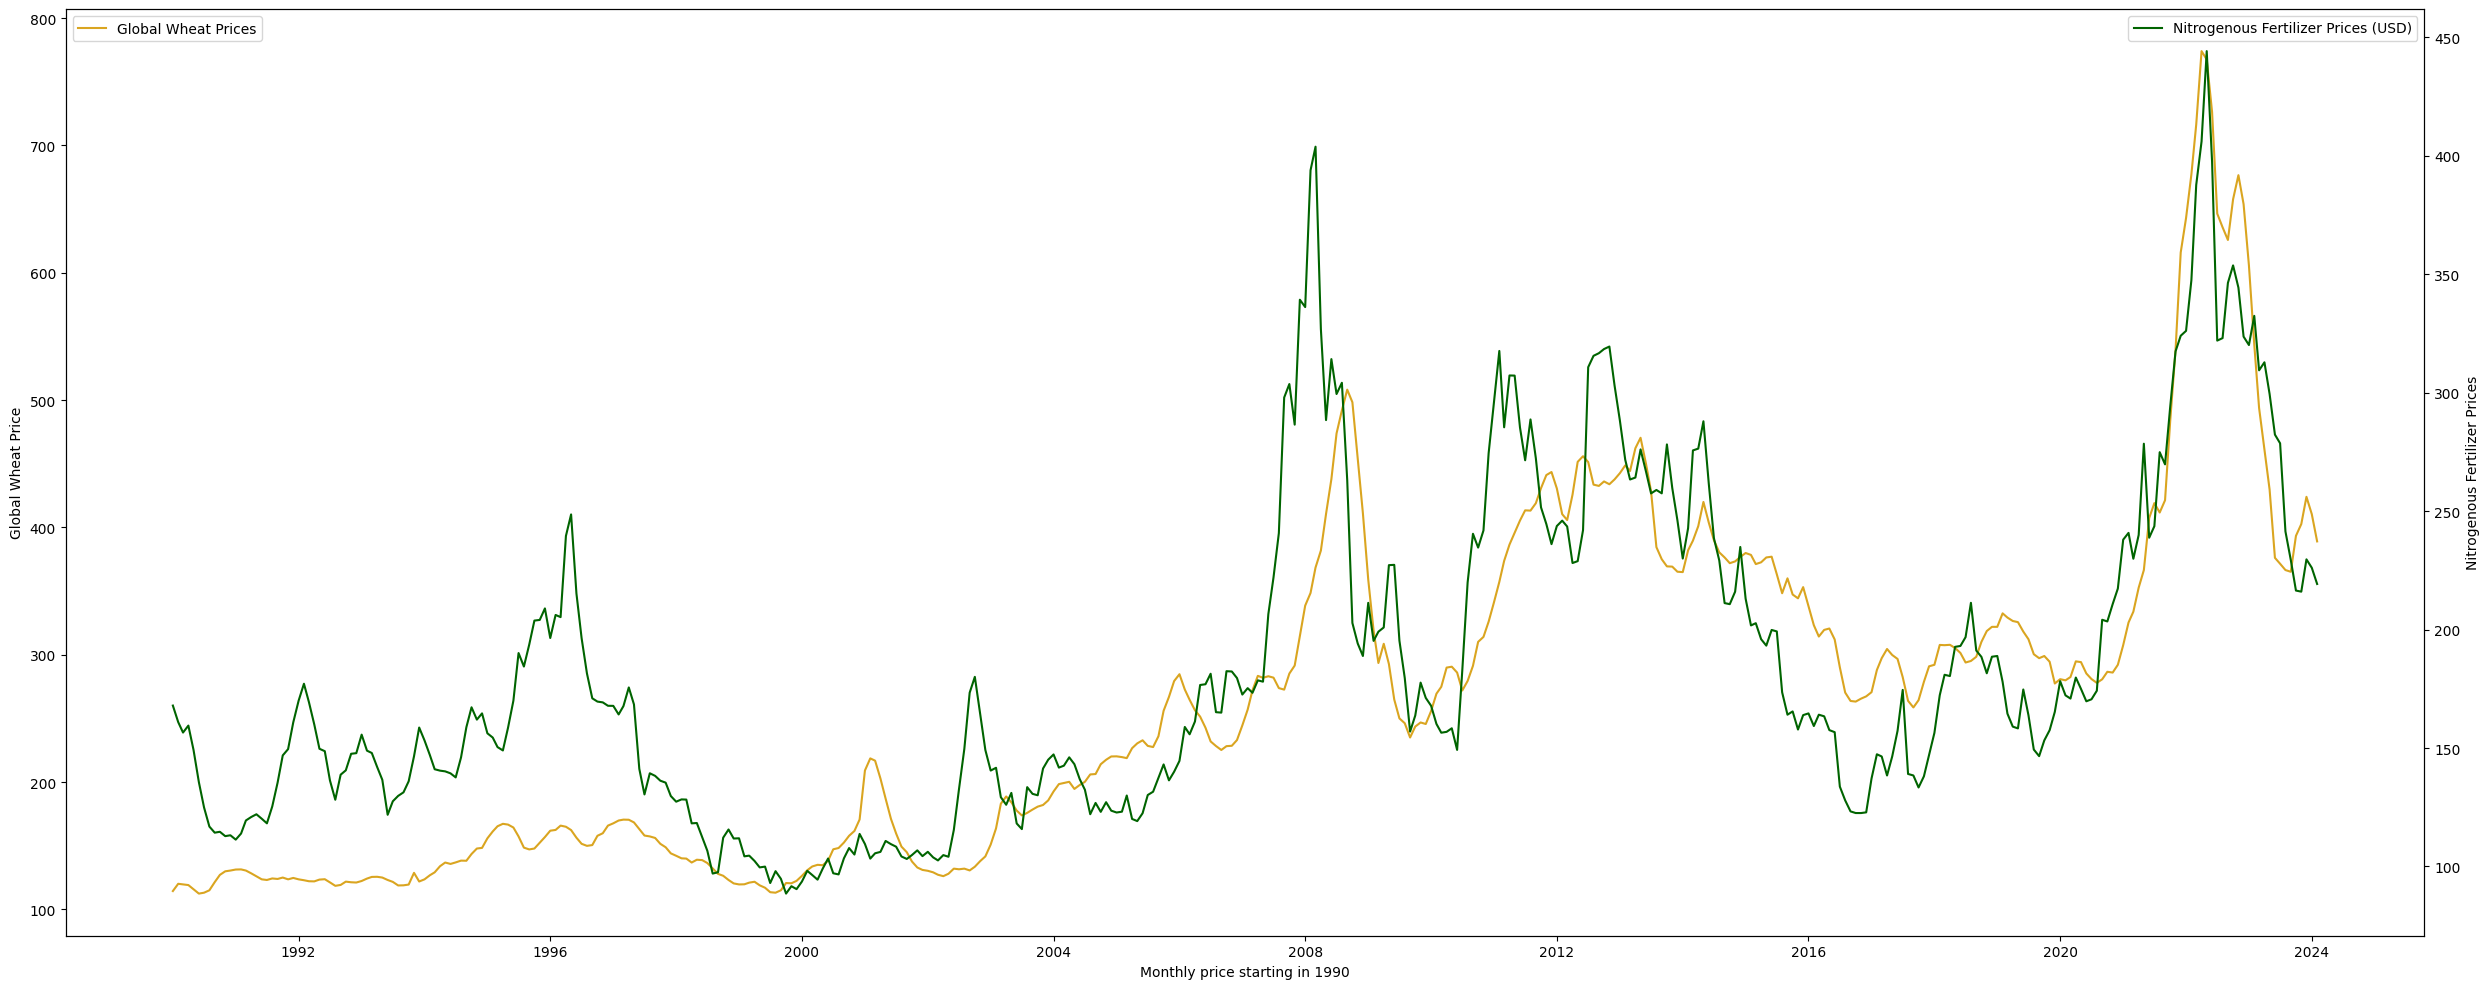

In [58]:
x = merged_df4.index
y1 = merged_df4['FERT']
y2 = merged_df4['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='#DAA520', label='Global Wheat Prices')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Global Wheat Price', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = 'darkgreen', label='Nitrogenous Fertilizer Prices (USD)') 
ax2.set_ylabel('Nitrogenous Fertilizer Prices', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [59]:
df1 = pd.read_csv('WPUSI024011.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df5 = pd.merge(df1, df2)

merged_df5['DATE'] = pd.to_datetime(merged_df5['DATE'])
merged_df5 = merged_df5.set_index('DATE')

merged_df5.rename(columns={'WPUSI024011': 'AGRI MACH', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df5.head()

,AGRI MACH,WHEAT (USD)
DATE,,
1990-01-01,122.3,167.918579
1990-02-01,122.4,160.937271
1990-03-01,122.8,156.528030
1990-04-01,123.2,159.467529
1990-05-01,123.2,149.179291


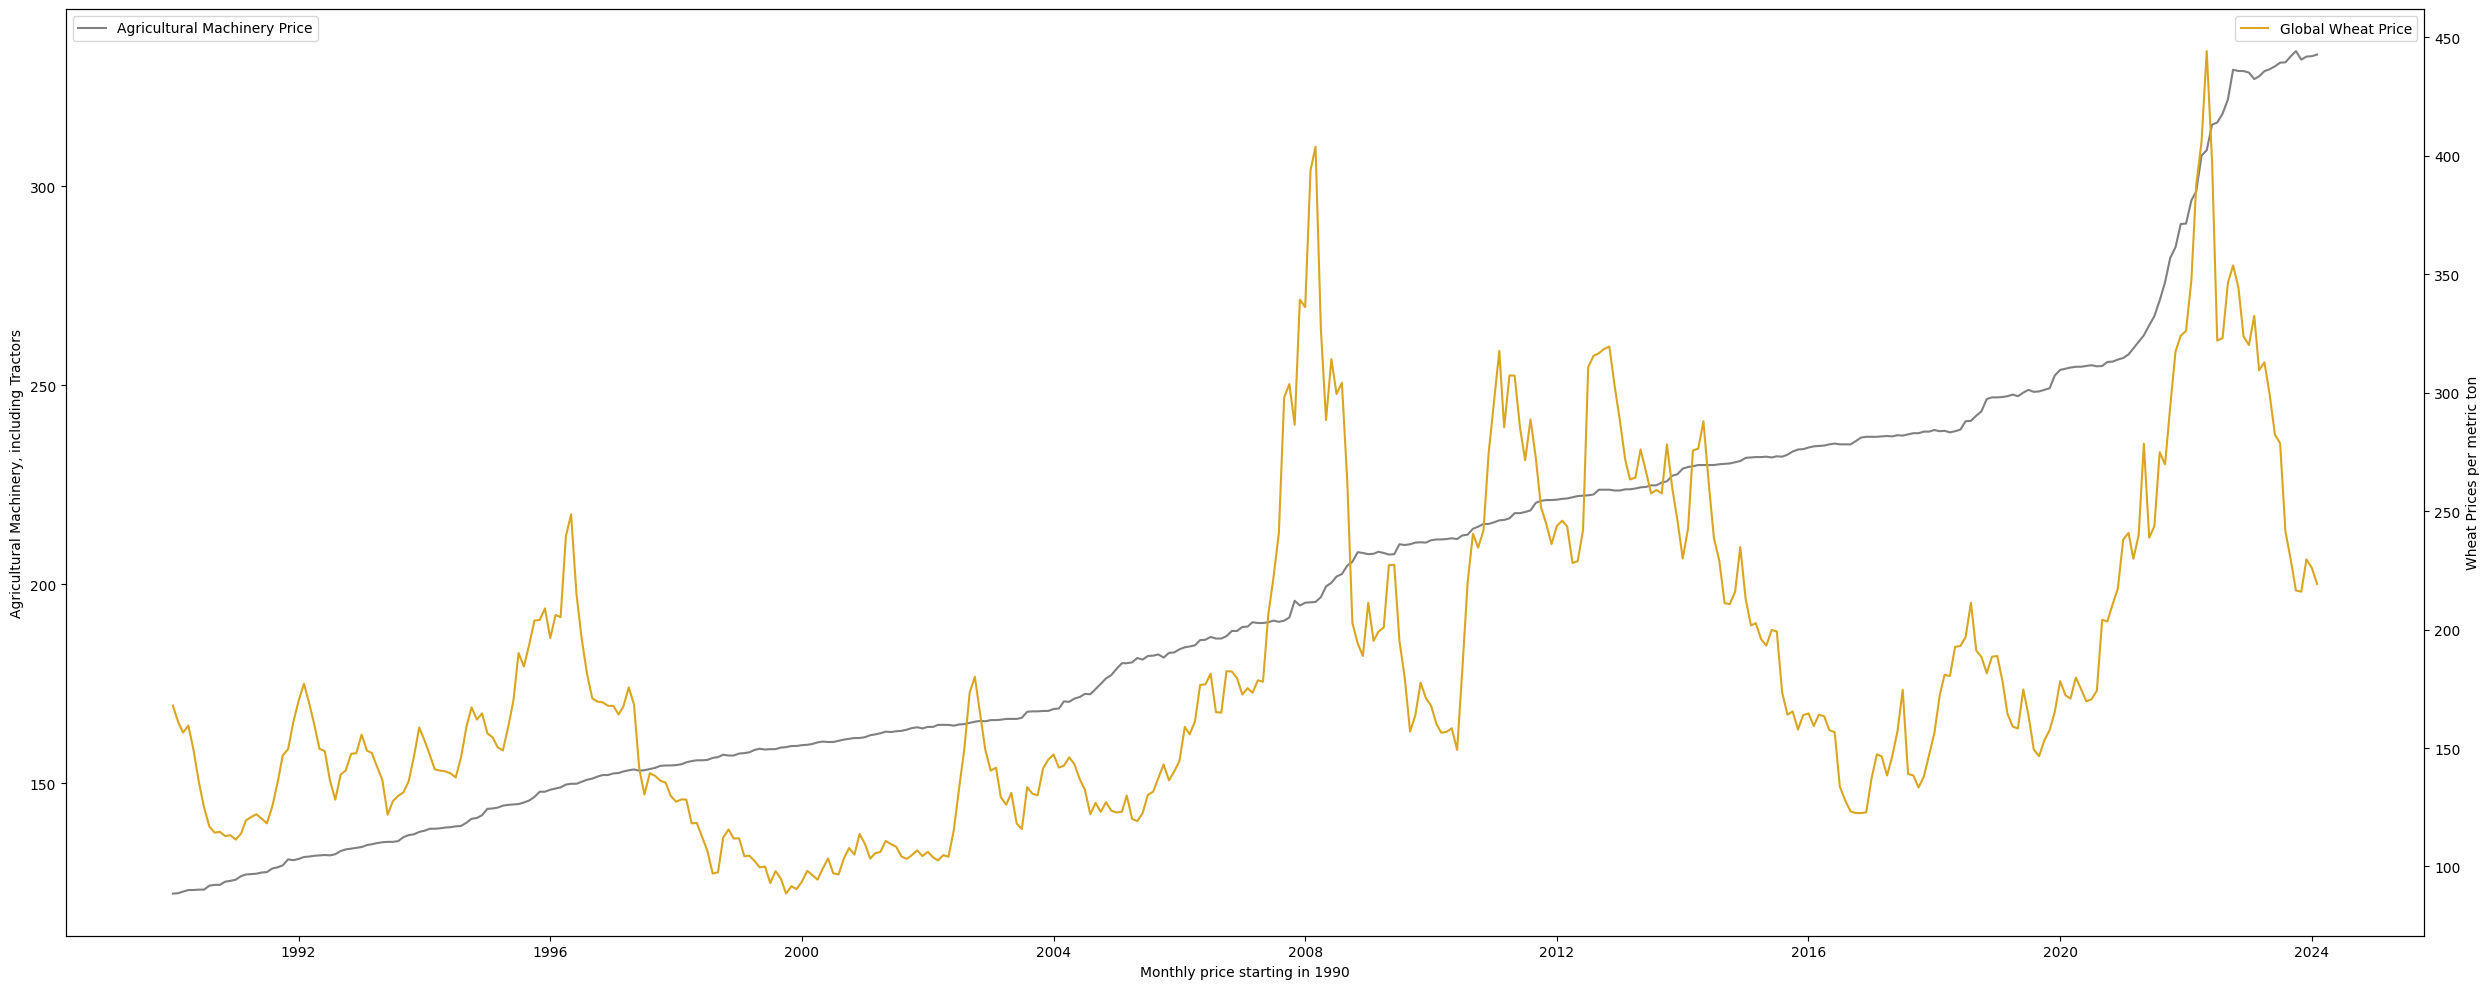

In [60]:
x = merged_df5.index
y1 = merged_df5['AGRI MACH']
y2 = merged_df5['WHEAT (USD)']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='Grey', label='Agricultural Machinery Price')
ax1.set_xlabel('Monthly price starting in 1990')
ax1.set_ylabel('Agricultural Machinery, including Tractors', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, color = '#DAA520', label='Global Wheat Price')  # the data was collected by the International Montetary Fund
ax2.set_ylabel('Wheat Prices per metric ton', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

In [61]:
df1 = pd.read_csv('Pesticide2003.csv')
df2 = pd.read_csv('PWHEAMTUSDM.csv')

merged_df6 = pd.merge(df1, df2)

merged_df6['DATE'] = pd.to_datetime(merged_df6['DATE'])
merged_df6 = merged_df6.set_index('DATE')

merged_df6.rename(columns={'PCU3253203253201': 'PEST', 'PWHEAMTUSDM': 'WHEAT (USD)'}, inplace=True)
merged_df6.head()

,PEST,WHEAT (USD)
DATE,,
2003-06-01,100.0,118.157134
2003-07-01,100.0,115.775953
2003-08-01,100.0,133.484492
2003-09-01,100.0,130.649980
2003-10-01,100.4,130.056604


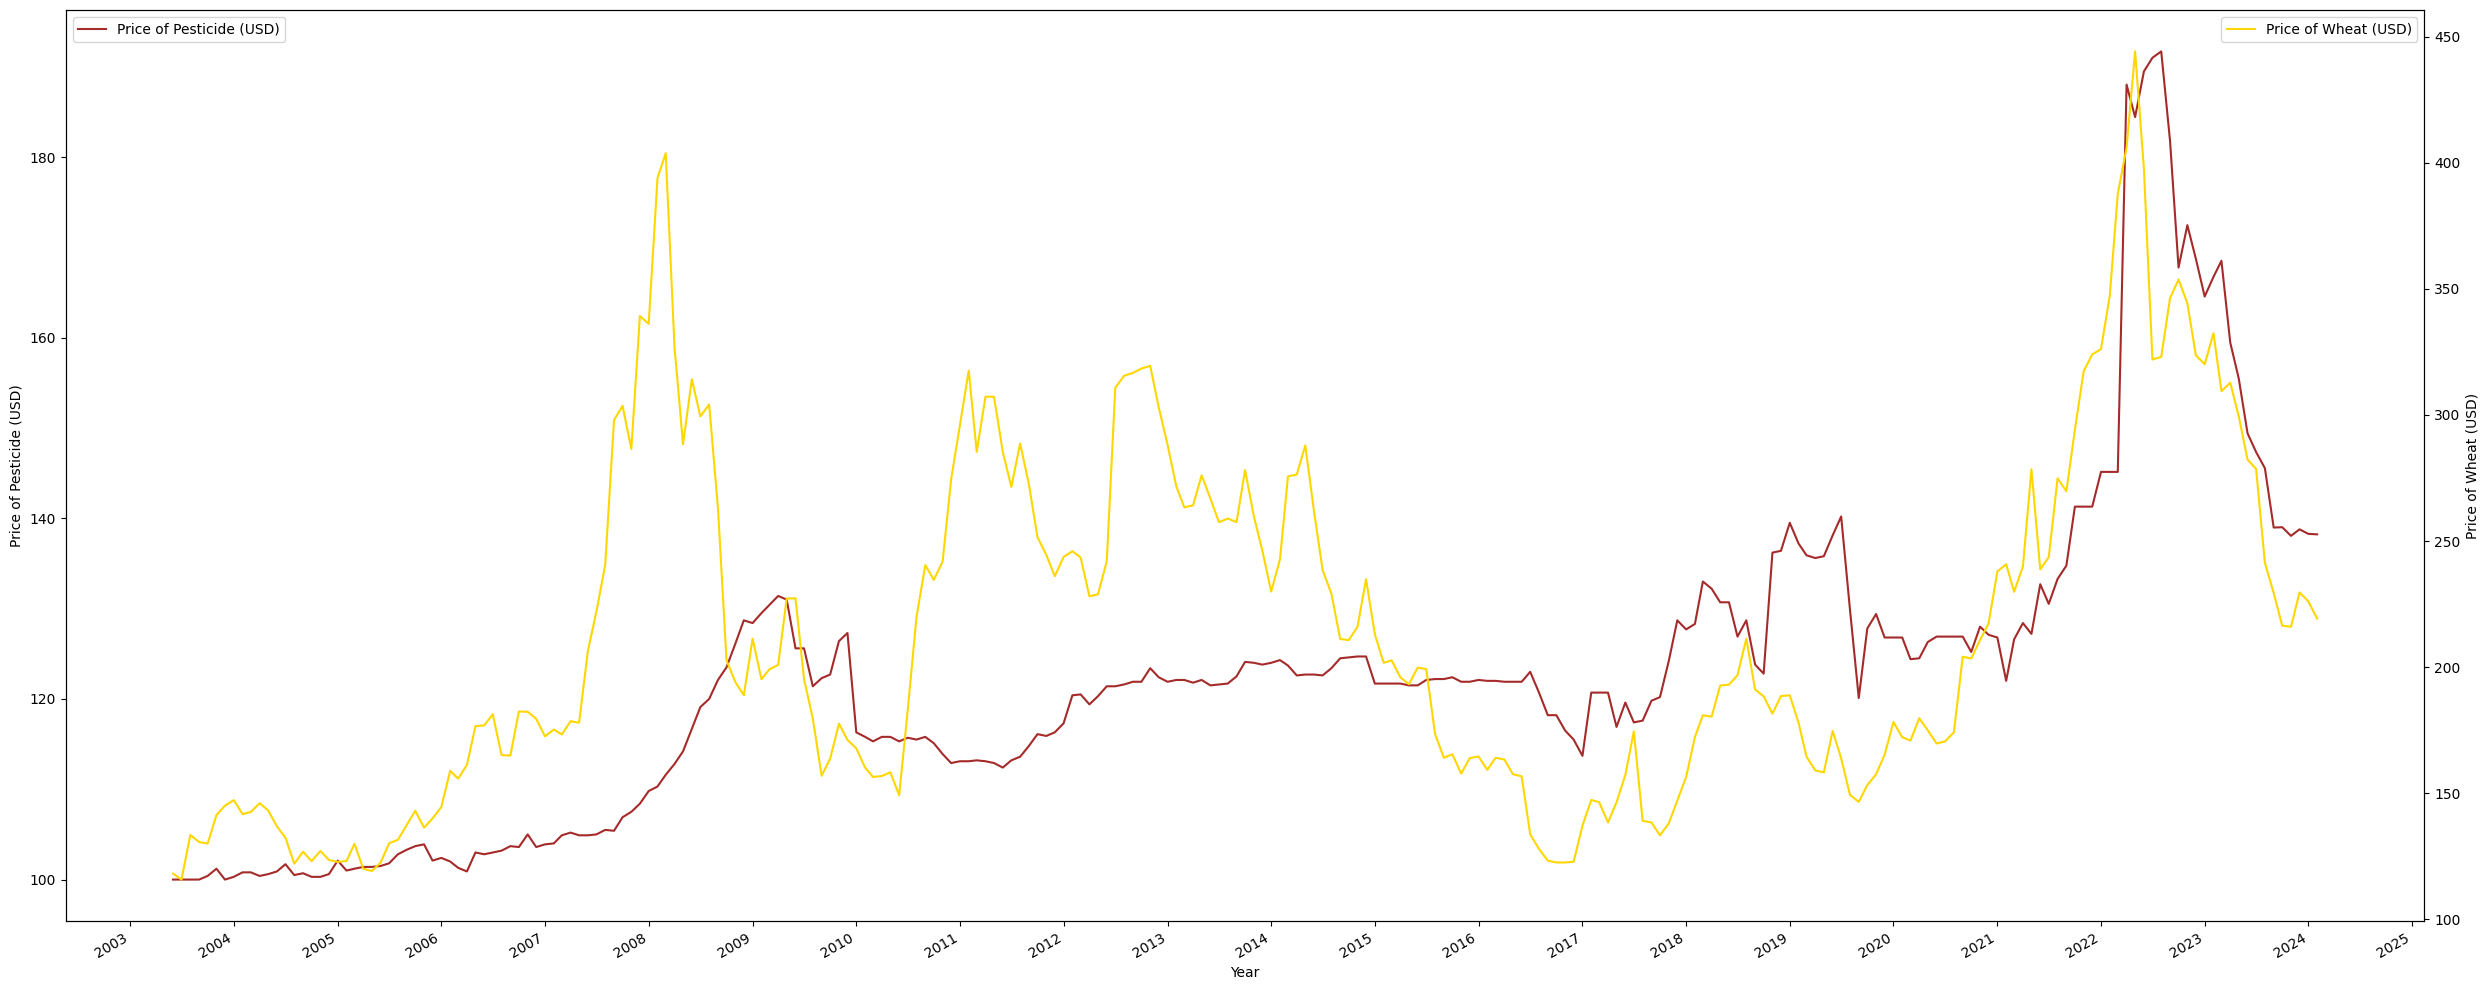

In [62]:
fig, ax1 = plt.subplots()

# use the 'Year' column as the x-axis values
x = merged_df6.index 
y1 = merged_df6['PEST']
y2 = merged_df6['WHEAT (USD)']

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Price of Pesticide (USD)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price of Pesticide (USD)', color='black')

# plot data on the second y-axis
ax2.plot(x, y2, 'gold', label='Price of Wheat (USD)') # The data was collected by the International Monetary Fund
ax2.set_ylabel('Price of Wheat (USD)', color='black')

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()


We decided to time-lag our seed data to account for the fact that seed demand at period t is determined by growing seasons of period t+1. We lag by one year, as this gives the highest correlation between seed data and wheat data, which will be demonstrated in the next section. Therefore, we proceed to use our lagged seed data by for further calculations, visualizations and models.

In [63]:
price = pd.read_csv('PWHEAMTUSDM.csv')  # WHEAT
seeds_0 = pd.read_csv('seeds.csv')  # seeds

test = pd.merge(price, seeds_0)

lags = range(1, 13)  # just two lags for demonstration.

lagged_df = test.assign(**{f'seed_price (t-{lag})': test['WPU02550304'].shift(-lag) for lag in lags})
lagged_df = lagged_df.rename(columns={"WPU02550304": "seed_price (t)", "PWHEAMTUSDM": "wheat_price"})
lagged_df

,DATE,wheat_price,seed_price (t),seed_price (t-1),seed_price (t-2),seed_price (t-3),seed_price (t-4),seed_price (t-5),seed_price (t-6),seed_price (t-7),seed_price (t-8),seed_price (t-9),seed_price (t-10),seed_price (t-11),seed_price (t-12)
0,1991-06-01,120.151794,100.000,102.400,102.400,102.400,101.700,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4
1,1991-07-01,118.209587,102.400,102.400,102.400,101.700,102.800,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4
2,1991-08-01,125.326843,102.400,102.400,101.700,102.800,102.500,102.4,101.7,101.6,101.5,103.4,103.4,103.4,103.6
3,1991-09-01,135.372879,102.400,101.700,102.800,102.500,102.400,101.7,101.6,101.5,103.4,103.4,103.4,103.6,102.6
4,1991-10-01,146.887192,101.700,102.800,102.500,102.400,101.700,101.6,101.5,103.4,103.4,103.4,103.6,102.6,102.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2023-10-01,216.463939,187.977,186.640,187.556,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,2023-11-01,216.000269,186.640,187.556,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
390,2023-12-01,229.633413,187.556,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
391,2024-01-01,226.078532,187.396,187.544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
y_lag = lagged_df.wheat_price  # target
col_names = lagged_df.columns.values.tolist()
col_names.remove('DATE')
col_names.remove('wheat_price')
X_lag = lagged_df[col_names]

# run correlations
# for each in col_names, run a correlation with wheat prices

corr_lag = {}
for i, e in enumerate(X_lag):
    corr_lag['t+'+ str(i)] = lagged_df["wheat_price"].corr(lagged_df[e])
    print(f"When lagged by {i} months, the correlation between wheat prices and seed prices is {corr_lag['t+'+str(i)]}.")

When lagged by 0 months, the correlation between wheat prices and seed prices is 0.464270148262589.
When lagged by 1 months, the correlation between wheat prices and seed prices is 0.468595798387648.
When lagged by 2 months, the correlation between wheat prices and seed prices is 0.4722888942772165.
When lagged by 3 months, the correlation between wheat prices and seed prices is 0.476033458974513.
When lagged by 4 months, the correlation between wheat prices and seed prices is 0.4797094109177849.
When lagged by 5 months, the correlation between wheat prices and seed prices is 0.4838935305506062.
When lagged by 6 months, the correlation between wheat prices and seed prices is 0.4879708027006044.
When lagged by 7 months, the correlation between wheat prices and seed prices is 0.4902769864893913.
When lagged by 8 months, the correlation between wheat prices and seed prices is 0.49261460728651596.
When lagged by 9 months, the correlation between wheat prices and seed prices is 0.4953773858

In [65]:
lagged_df_12 = test.assign(**{f'seed_price (t-{12})': test['WPU02550304'].shift(-12)})
lagged_df_12 = lagged_df.rename(columns={"WPU02550304": "seed_price (t)", "PWHEAMTUSDM": "wheat_price"})
lagged_df_12.head()

,DATE,wheat_price,seed_price (t),seed_price (t-1),seed_price (t-2),seed_price (t-3),seed_price (t-4),seed_price (t-5),seed_price (t-6),seed_price (t-7),seed_price (t-8),seed_price (t-9),seed_price (t-10),seed_price (t-11),seed_price (t-12)
0,1991-06-01,120.151794,100.0,102.4,102.4,102.4,101.7,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4
1,1991-07-01,118.209587,102.4,102.4,102.4,101.7,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4
2,1991-08-01,125.326843,102.4,102.4,101.7,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4,103.6
3,1991-09-01,135.372879,102.4,101.7,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4,103.6,102.6
4,1991-10-01,146.887192,101.7,102.8,102.5,102.4,101.7,101.6,101.5,103.4,103.4,103.4,103.6,102.6,102.7


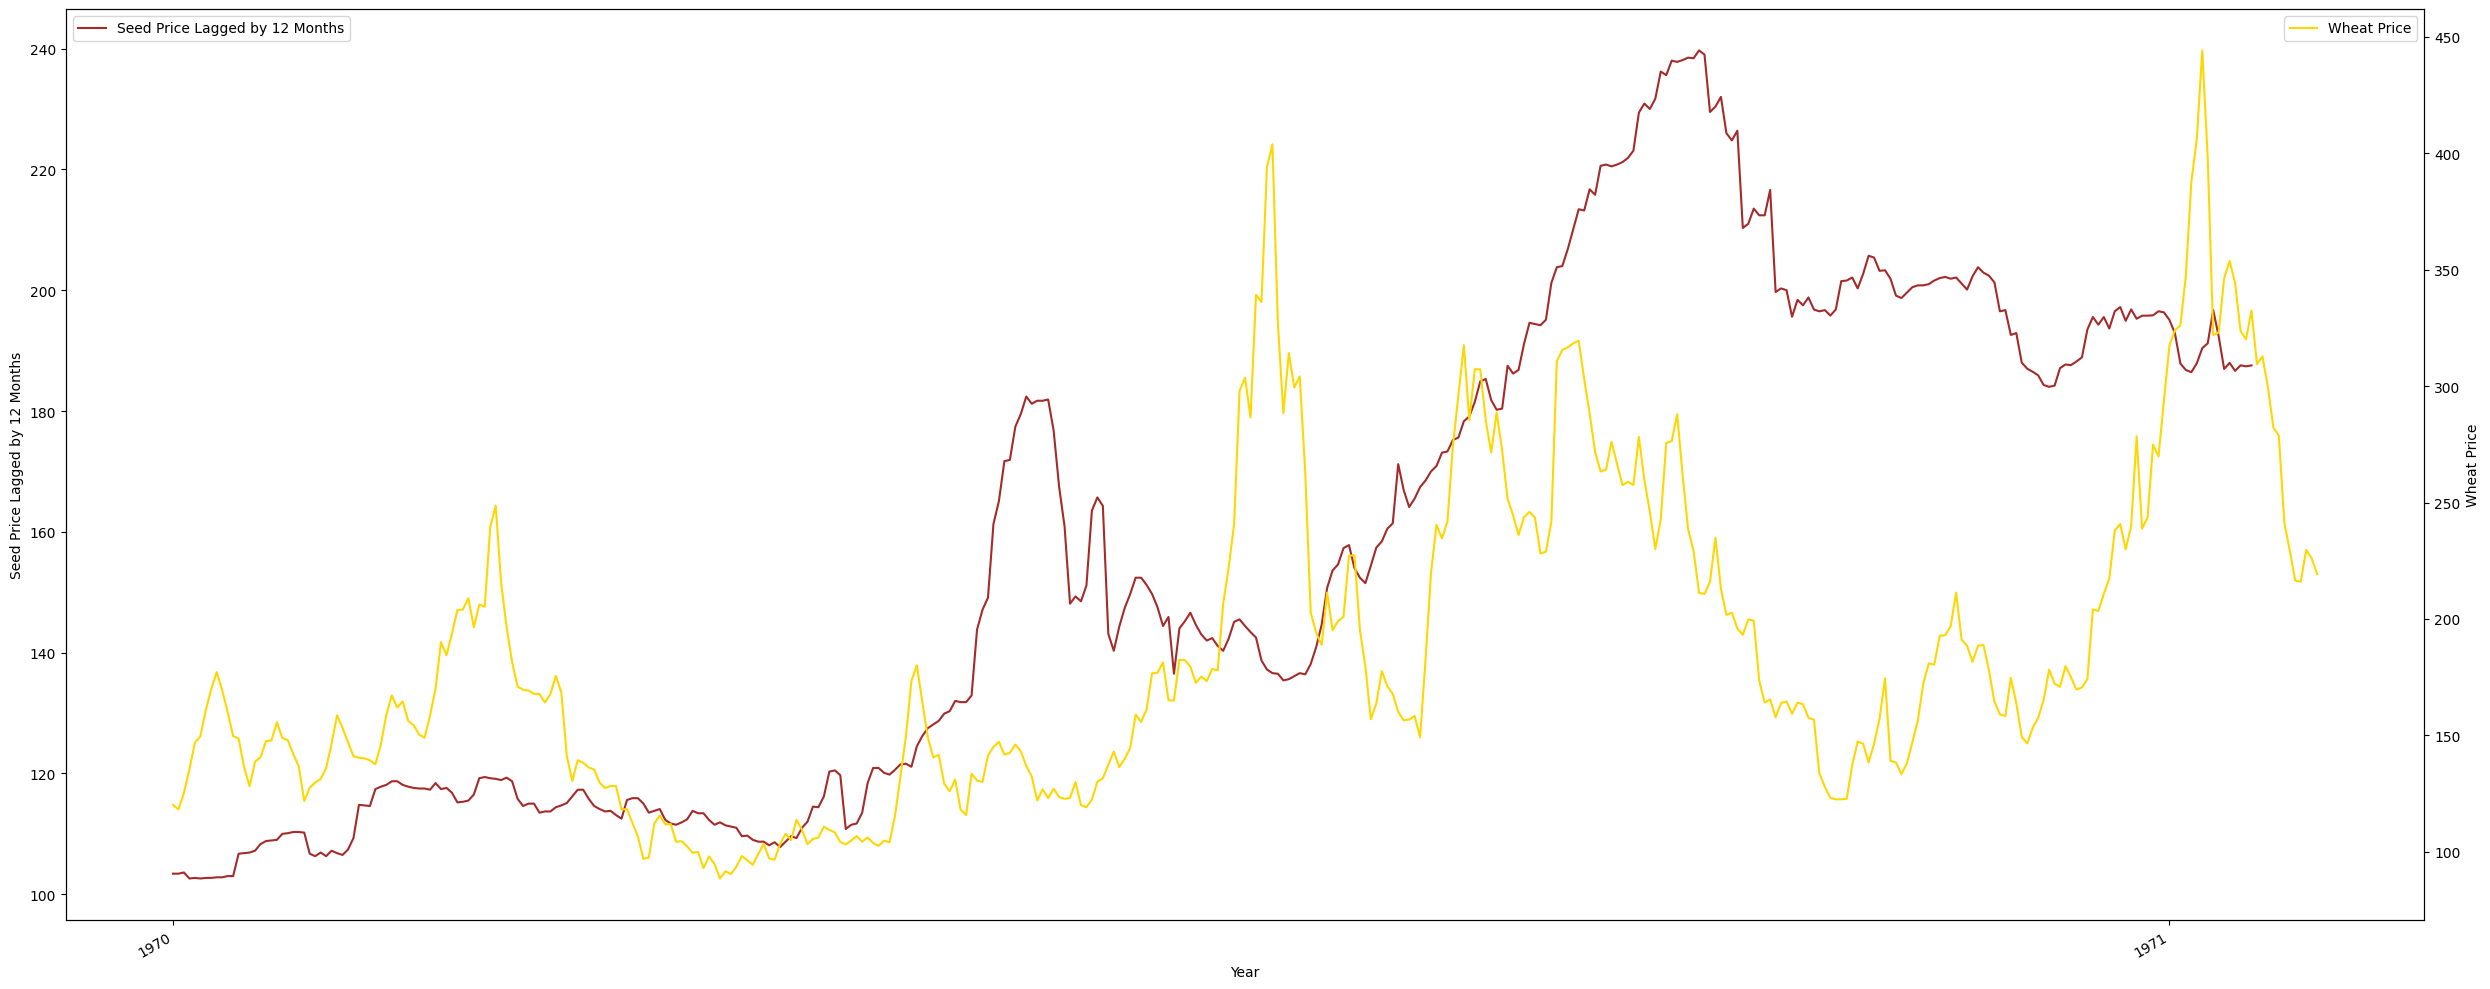

In [66]:
fig, ax1 = plt.subplots()

# use the 'Year' column as the x-axis values
x = lagged_df_12.index 
y1 = lagged_df_12['seed_price (t-12)']
y2 = lagged_df_12['wheat_price']

ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, 'brown', label='Seed Price Lagged by 12 Months')
ax1.set_xlabel('Year')
ax1.set_ylabel('Seed Price Lagged by 12 Months', color='black')

ax2.plot(x, y2, 'gold', label='Wheat Price')
ax2.set_xlabel('Year')
ax2.set_ylabel('Wheat Price', color='black')

# display legend for y-axis
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.autofmt_xdate()

plt.show()

In [67]:
pcpt_raw = pd.read_csv("weather data.csv")
wprod_raw = pd.read_csv("wheat production.csv")

# remove unecesary columns
wprod = wprod_raw.drop(wprod_raw.columns[list(range(6, 13))], axis = 1)

# remove rows 243 to 249 for production data
wprod = wprod.drop(list(range(243, 250)))

# remove 2024 data for weather data
pcpt_raw = pcpt_raw.drop(list(range(408, 410)))

# assign column names
wprod.columns = ['Year', 'Quarter', 'Beginning stocks', 'Production', 'Imports', 'Total supply']

# drop empty rows to get yearly production data
test = wprod.dropna(subset = ['Year','Production'])
test = test.reset_index(drop = True)
y1 = list(map(str, list(range(1975, 2024))))
y2 = list(map(str, list(range(1976, 2025))))
test.loc[:, 'Year'] = [u+'/'+i for u, i in zip(y1, y2)]

# remove years before 1990 (so first entry is now 1990/1991)
test_red = test.drop(list(range(0, 15))).reset_index(drop=True)

# now merge yearly precipitation with yearly production
year = list(range(1990, 2024))  # length is 34

pcpt_year = pcpt_raw.groupby(np.arange(len(pcpt_raw))//12).mean()

df = pd.DataFrame([year, test_red['Production'], pcpt_year['Value']]).T
df.columns = ['Year', 'Production', 'Precipitation']
df = df.set_index('Year')
df["Production"] = df["Production"].str.replace(",","").astype(float)
df["Precipitation"] = df["Precipitation"].astype(float)

df.head()

,Production,Precipitation
Year,,
1990,2730.0,2.680833
1991,1980.0,2.703333
1992,2467.0,2.605000
1993,2396.0,2.718333
1994,2321.0,2.551667


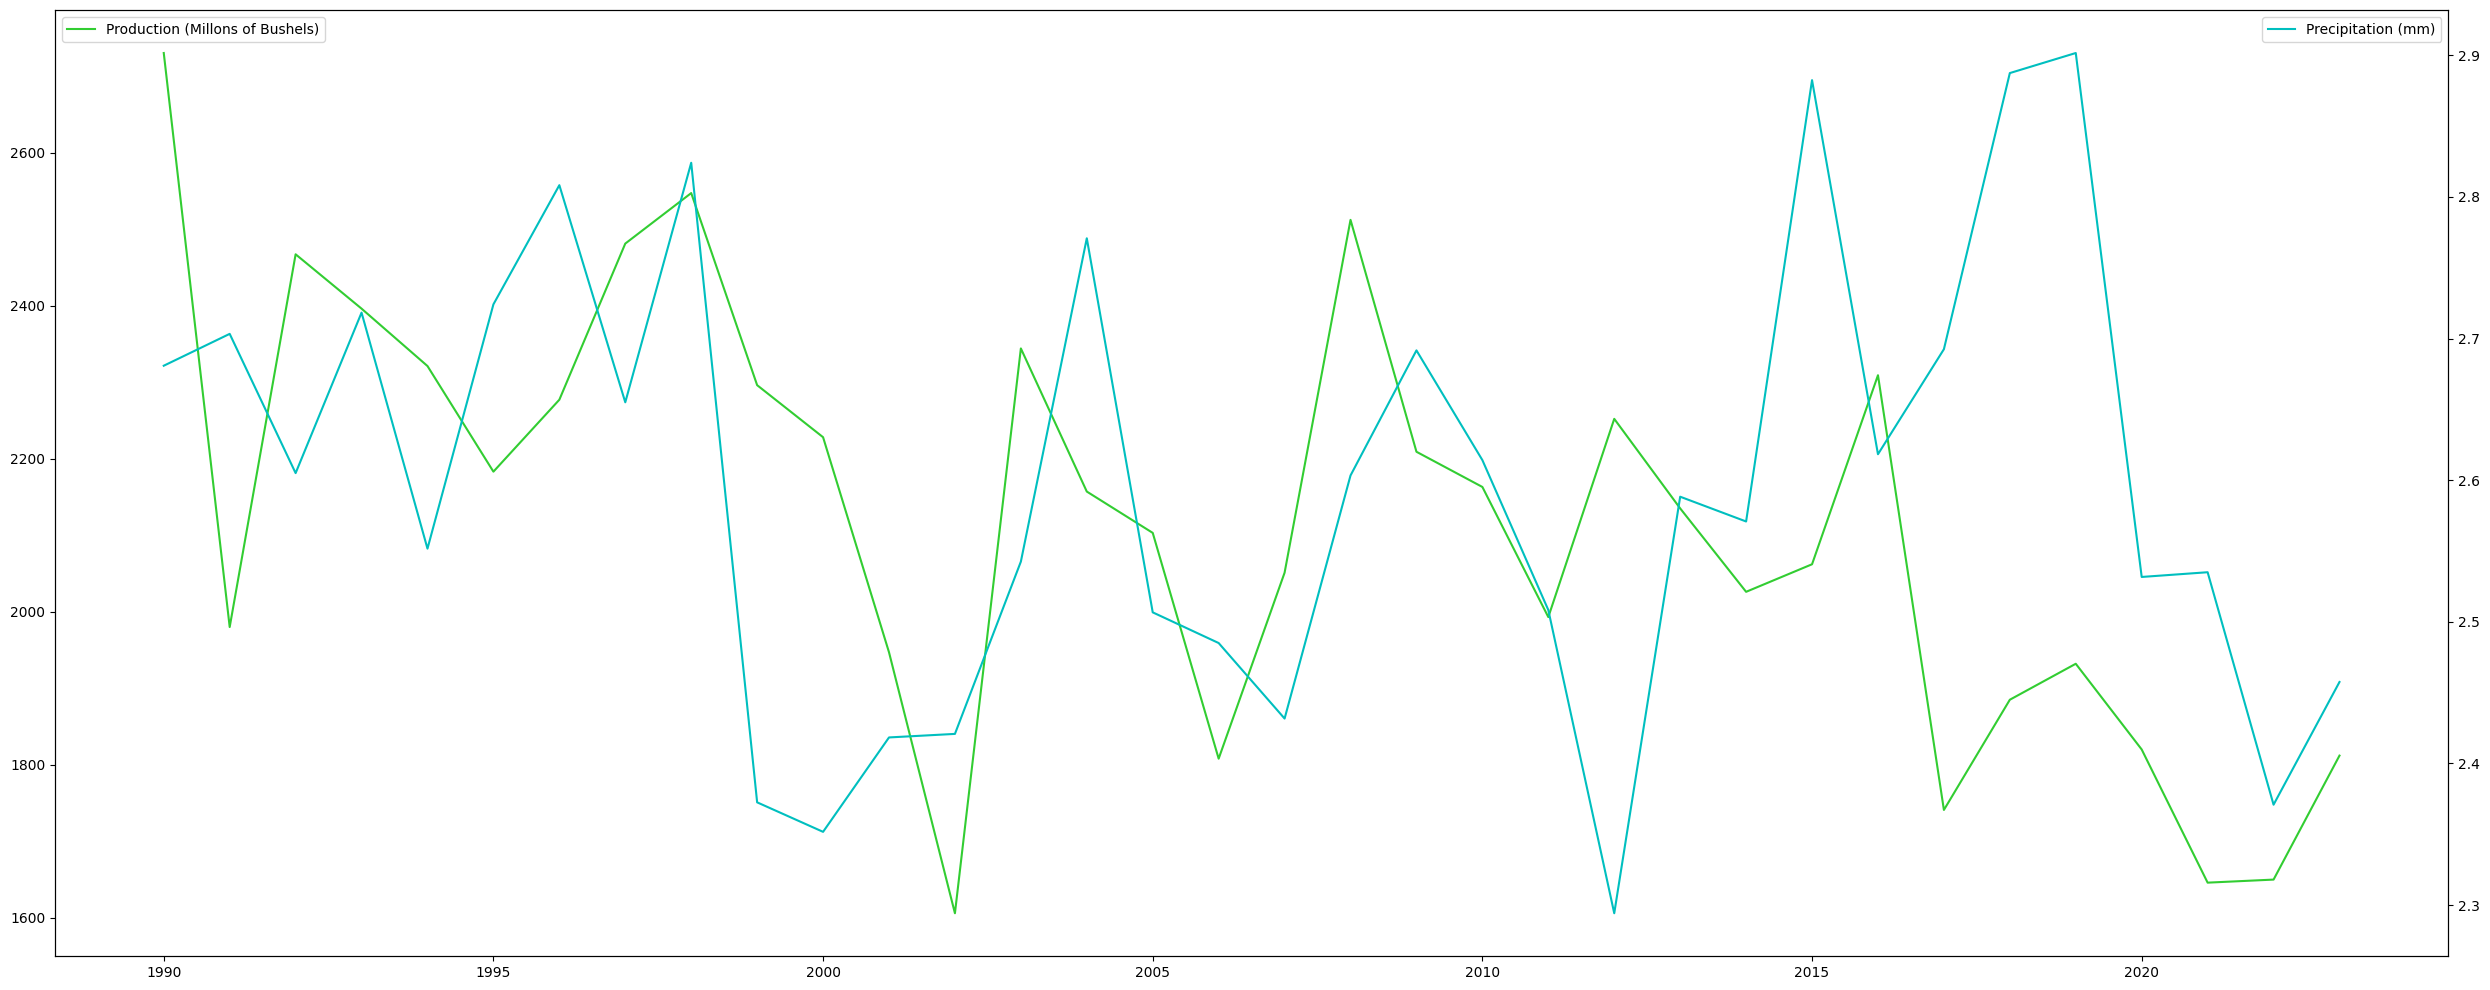

In [68]:
x = df.index
y1 = df['Production']
y2 = df['Precipitation']

fig, ax1 = plt.subplots()

# duplicate the x-axis for the second y-axis
ax2 = ax1.twinx()

# plot data on the first y-axis
ax1.plot(x, y1, color ='limegreen', label='Production (Millons of Bushels)')
ax2.plot(x, y2, color = 'c', label='Precipitation (mm)')  # the data was collected by the International Montetary Fund

# display legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

## Correlation Coefficients

We proceed to calculate correlation coefficients between prices to pinpoint the most significant determinants of wheat prices.

In [69]:
Wheat_Oil_Corr = merged_df1["WTI"].corr(merged_df1["WHEAT (USD)"])
Fertilizer_Oil_Corr = merged_df2["WTI"].corr(merged_df2["FERT"])
AgMech_Oil_Corr = merged_df3["WTI"].corr(merged_df3["AGRI MACH"])
Fert_Wheat_Corr = merged_df4["FERT"].corr(merged_df4["WHEAT (USD)"])
AgMech_Wheat_Corr = merged_df5["AGRI MACH"].corr(merged_df5["WHEAT (USD)"])
Pesticide_Wheat_Corr = merged_df6["PEST"].corr(merged_df6["WHEAT (USD)"])
Seed_Wheat_Corr = lagged_df_12['seed_price (t-12)'].corr(lagged_df_12['wheat_price'])
WheatProd_Precip_Corr = df['Production'].corr(df['Precipitation'])

Wheat_Oil_Corr, Fertilizer_Oil_Corr, AgMech_Oil_Corr, Fert_Wheat_Corr, AgMech_Wheat_Corr, Pesticide_Wheat_Corr, Seed_Wheat_Corr, WheatProd_Precip_Corr

(0.7816870663891703,
 0.8361374552246091,
 0.6840589469388291,
 0.8338631173271533,
 0.6294197632618082,
 0.5474396510682035,
 0.5013909035767172,
 0.2212097443743315)

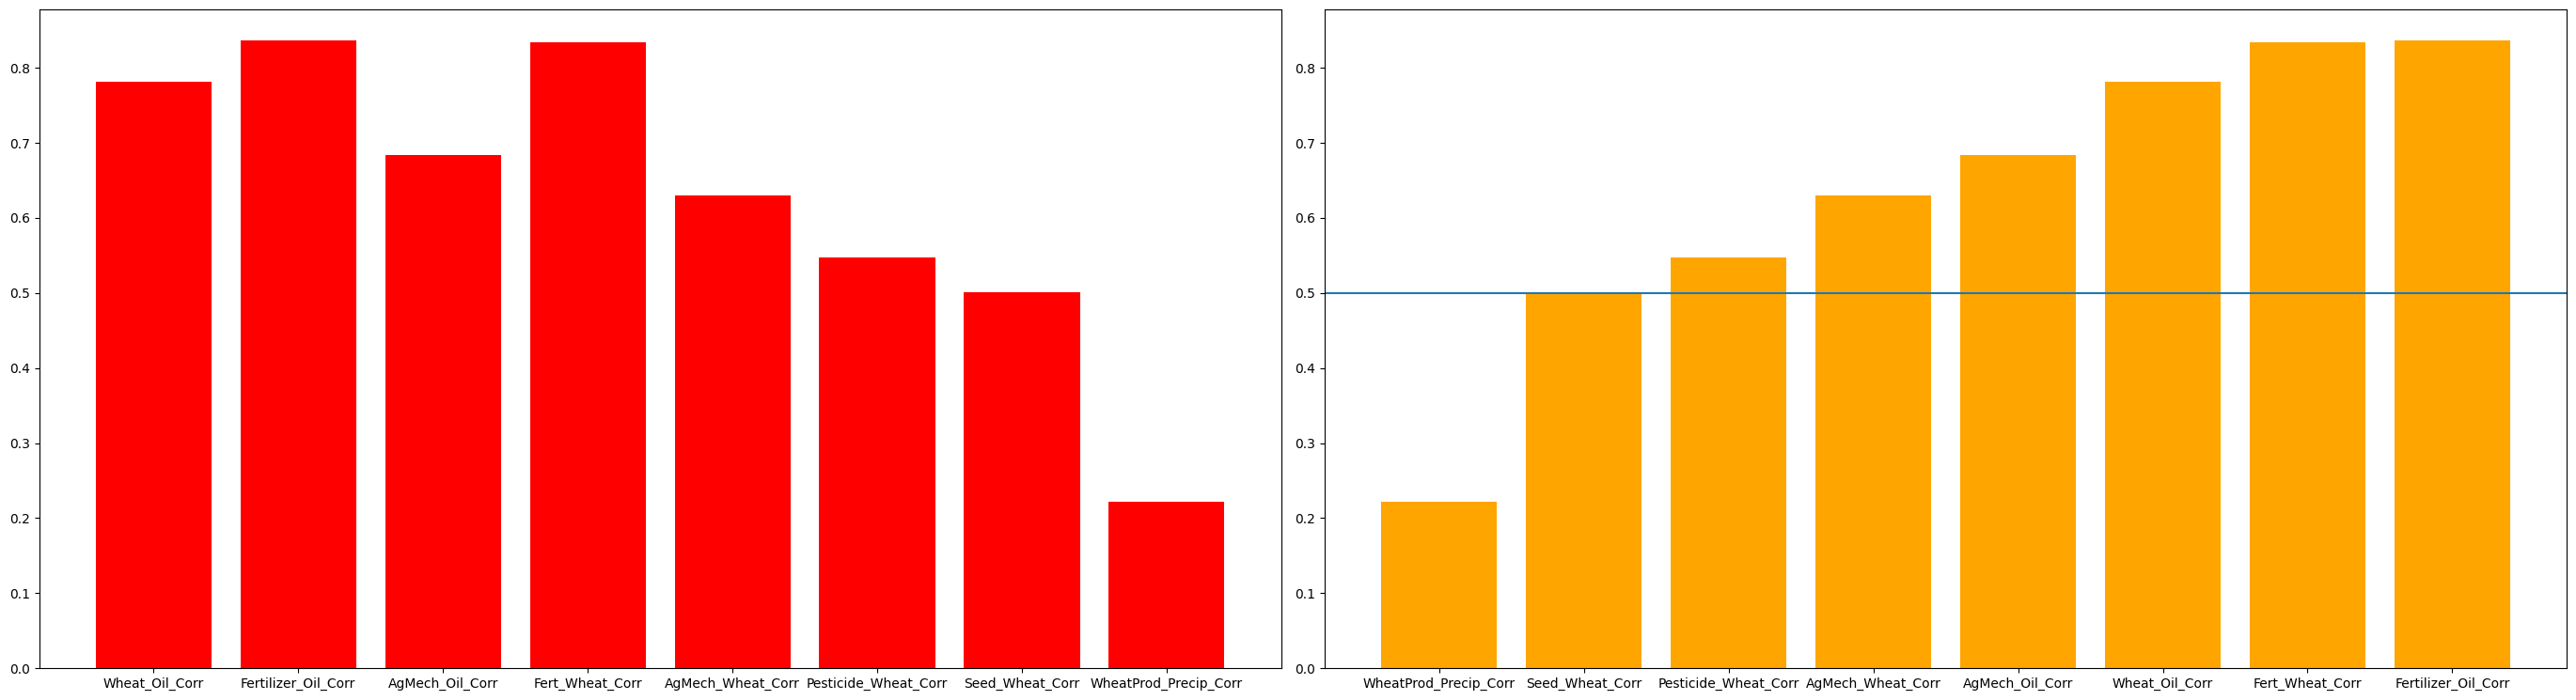

In [70]:
plt.rcParams["figure.figsize"] = [27.50, 7.55]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(
   dict(
      names=["Wheat_Oil_Corr", "Fertilizer_Oil_Corr", "AgMech_Oil_Corr", "Fert_Wheat_Corr", "AgMech_Wheat_Corr", "Pesticide_Wheat_Corr", "Seed_Wheat_Corr", "WheatProd_Precip_Corr"],
      marks=[0.7816870663891703, 0.8361374552246091, 0.6840589469388291, 0.8338631173271533, 0.6294197632618082, 0.5474396510682035, 0.5013909035767172, 0.2212097443743315 ])
)

plt.subplot(121)
plt.bar('names', 'marks', data=df, color='red')

plt.subplot(122)
df_sorted = df.sort_values('marks')
plt.bar('names', 'marks', data=df_sorted, color='orange')

plt.axhline(y=0.5)

plt.show()

The most surprising result of the graphs was the weak correlations of pesticides, seeds and the impact of precipitations on wheat production. The pesticide correlation can be attributed to the fact that wheat represents a fraction of the total use of pesticides in modern agriculture. Seed prices do not necessarily accurately reflect current or future prices of wheat due to the international variety of wheat seed types, as the seeds are often regionally specific to accommodate for soil types. Finally, the impact of precipitation on wheat production, which included lagging by up to 3 years, actually made the correlation worse. While this data is  regionally specific to the United States, it suggests the strong impact of irrigation efforts in mitigating the variation of rainfall for wheat production in the United States. Due to this weak relationship, precipitation will be omitted from our lasso regression.

## Lasso Regression

In [75]:
import pandas as pd

df1 = pd.read_csv('PCU325311325311.csv') # fert
df2 = pd.read_csv('WTISPLC.csv') # oil
df3 = pd.read_csv('WPUSI024011.csv') # agri mech
df4 = pd.read_csv('PWHEAMTUSDM.csv') # WHEAT
df5 = pd.read_csv('Pesticide2003.csv') # pesticide
df6 = pd.read_csv('farm_wage_data_99t22.csv') # wages
seeds = pd.read_csv('seeds.csv') # seeds
seeds_lag = seeds.assign(**{f'seed_price (t-{12})': seeds['WPU02550304'].shift(-12)})
df7 = seeds_lag.drop(columns={'WPU02550304'})

df_list = [df1, df2, df3, df4, df5, df7] # ignore df6 for now
merged_df = pd.DataFrame()
merged_df = df_list[0]

for df in df_list[1:]:
    merged_df = pd.merge(merged_df, df, on='DATE', how='inner')
    
merged_df.columns

Index(['DATE', 'PCU325311325311', 'WTISPLC', 'WPUSI024011', 'PWHEAMTUSDM',
       'PCU3253203253201', 'seed_price (t-12)'],
      dtype='object')

In [76]:
merged_df = merged_df.dropna(axis=0)
merged_df

,DATE,PCU325311325311,WTISPLC,WPUSI024011,PWHEAMTUSDM,PCU3253203253201,seed_price (t-12)
0,2003-06-01,177.600,30.72,166.200,118.157134,100.000,131.800
1,2003-07-01,173.800,30.76,166.500,115.775953,100.000,131.800
2,2003-08-01,175.800,31.59,168.000,133.484492,100.000,132.900
3,2003-09-01,178.400,28.29,168.100,130.649980,100.000,143.800
4,2003-10-01,180.700,30.33,168.100,130.056604,100.400,147.100
...,...,...,...,...,...,...,...
232,2022-10-01,657.695,87.55,329.336,353.712907,167.761,187.977
233,2022-11-01,676.643,84.37,329.027,344.329861,172.453,186.640
234,2022-12-01,653.888,76.44,329.014,323.654838,168.727,187.556
235,2023-01-01,605.750,78.12,328.625,320.097045,164.550,187.396


In [77]:
y = merged_df.PWHEAMTUSDM # target
y

0      118.157134
1      115.775953
2      133.484492
3      130.649980
4      130.056604
          ...    
232    353.712907
233    344.329861
234    323.654838
235    320.097045
236    332.412023
Name: PWHEAMTUSDM, Length: 237, dtype: float64

In [78]:
features = ['PCU325311325311', 'WTISPLC', 'WPUSI024011', 'PCU3253203253201', 'seed_price (t-12)']
#features = ['WTISPLC']
X = merged_df[features]
X.describe()

,PCU325311325311,WTISPLC,WPUSI024011,PCU3253203253201,seed_price (t-12)
count,237.000000,237.000000,237.000000,237.000000,237.000000
mean,341.144502,68.607300,224.581907,121.245772,183.441367
std,114.206031,23.375202,35.113883,16.830574,28.000784
min,173.800000,16.550000,166.200000,100.000000,131.800000
25%,270.600000,49.820000,199.500000,112.800000,157.800000
50%,310.100000,64.970000,224.100000,121.700000,187.700000
75%,389.900000,87.550000,238.500000,126.800000,201.200000
max,774.068000,133.930000,329.336000,191.692000,239.700000


In [79]:
X.head()

,PCU325311325311,WTISPLC,WPUSI024011,PCU3253203253201,seed_price (t-12)
0,177.6,30.72,166.2,100.0,131.8
1,173.8,30.76,166.5,100.0,131.8
2,175.8,31.59,168.0,100.0,132.9
3,178.4,28.29,168.1,100.0,143.8
4,180.7,30.33,168.1,100.4,147.1


In [80]:
from sklearn.tree import DecisionTreeRegressor

wheat_model = DecisionTreeRegressor(random_state=1)
wheat_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [81]:
predictions = wheat_model.predict(X)
print(predictions)
print(y)

[118.15713381 115.77595333 133.4844919  130.64998048 130.05660449
 141.34708404 145.0674954  147.28961238 141.73385947 142.548725
 146.06482349 143.18426737 136.86140984 132.387431   122.05578
 126.8207655  123.05628937 127.13308667 123.55457304 122.77896217
 123.12996088 129.95566833 120.06430508 119.1544619  122.47332167
 130.16443917 131.55830217 137.38631937 143.07283921 136.3539973
 139.99337    144.5679565  158.88735018 155.79314667 161.20800281
 176.60342333 176.920755   181.34836683 165.12937833 164.94231967
 182.432305   182.30107762 179.52955533 172.5666305  175.26729
 173.313195   178.55584817 178.00636333 206.51690365 222.0017346
 240.68699217 297.95245912 303.63049072 286.4956181  339.22569593
 336.11706508 393.87373483 403.81289667 326.85161667 288.42028635
 314.15835    299.42748    304.16407267 263.04965937 202.774935
 194.11462961 188.84494968 211.27608333 195.22490263 199.10056833
 200.88764667 227.186091   227.31469383 195.32599167 179.55405111
 156.93045063 163.7264

In [82]:
exact_matches = sum(1 for pred, actual in zip(predictions, y) if pred == actual)

print(f"Number of exact matches: {exact_matches} and {len(y)}")

Number of exact matches: 237 and 237


In [83]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, predictions)

0.0

In [84]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

new_wheat_model = DecisionTreeRegressor()
new_wheat_model.fit(train_X, train_y)

val_predictions = new_wheat_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

15.424030319623483


In [85]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [86]:
for max_leaf_nodes in [i for i in range(5, 100, 5)]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  25
Max leaf nodes: 10  		 Mean Absolute Error:  21
Max leaf nodes: 15  		 Mean Absolute Error:  19
Max leaf nodes: 20  		 Mean Absolute Error:  17
Max leaf nodes: 25  		 Mean Absolute Error:  17
Max leaf nodes: 30  		 Mean Absolute Error:  18
Max leaf nodes: 35  		 Mean Absolute Error:  17
Max leaf nodes: 40  		 Mean Absolute Error:  17
Max leaf nodes: 45  		 Mean Absolute Error:  17
Max leaf nodes: 50  		 Mean Absolute Error:  16
Max leaf nodes: 55  		 Mean Absolute Error:  15
Max leaf nodes: 60  		 Mean Absolute Error:  15
Max leaf nodes: 65  		 Mean Absolute Error:  15
Max leaf nodes: 70  		 Mean Absolute Error:  15
Max leaf nodes: 75  		 Mean Absolute Error:  15
Max leaf nodes: 80  		 Mean Absolute Error:  15
Max leaf nodes: 85  		 Mean Absolute Error:  15
Max leaf nodes: 90  		 Mean Absolute Error:  15
Max leaf nodes: 95  		 Mean Absolute Error:  15


In [87]:
best_tree_size = 55

In [88]:
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=1)

final_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=55, random_state=1)

In [89]:
f_val_predictions = final_model.predict(val_X)
print(mean_absolute_error(val_y, f_val_predictions))

5.520006831905968


In [90]:
f_val_predictions, len(f_val_predictions), len(val_y) # these are predictions for the upcoming 5 years and 3 months

(array([135.87807933, 162.7285664 , 237.20527503, 311.1272649 ,
        274.4343637 , 348.5153318 , 255.65473018, 195.58120243,
        174.70125773, 173.81600673, 271.96035311, 173.81600673,
        203.7818069 , 237.20527503, 326.37462611, 162.7285664 ,
        184.04568042, 237.20527503, 195.58120243, 139.84439581,
        337.6713805 , 297.31905256, 238.13315865, 139.84439581,
        125.30623907, 174.70125773, 221.28938747, 139.84439581,
        311.1272649 , 217.01801029, 272.30476865, 271.96035311,
        326.37462611, 195.58120243, 174.70125773, 162.7285664 ,
        147.07623726, 203.7818069 , 174.70125773, 277.4970252 ,
        233.80913692, 125.30623907, 162.7285664 , 125.30623907,
        257.31939706, 139.84439581, 196.58466064, 129.67308332,
        221.28938747, 184.04568042, 173.81600673, 297.31905256,
        162.03233261, 159.09978924, 159.09978924, 162.7285664 ,
        129.67308332, 147.07623726, 202.774935  , 237.14358263]),
 60,
 60)

[ 0.34822085  1.28240286  0.30558094 -0.45839942 -0.31031972]
     PCU325311325311  WTISPLC  WPUSI024011  PCU3253203253201  \
0            177.600    30.72      166.200           100.000   
1            173.800    30.76      166.500           100.000   
2            175.800    31.59      168.000           100.000   
3            178.400    28.29      168.100           100.000   
4            180.700    30.33      168.100           100.400   
..               ...      ...          ...               ...   
232          657.695    87.55      329.336           167.761   
233          676.643    84.37      329.027           172.453   
234          653.888    76.44      329.014           168.727   
235          605.750    78.12      328.625           164.550   
236          543.660    76.83      327.000           166.727   

     seed_price (t-12)  
0              131.800  
1              131.800  
2              132.900  
3              143.800  
4              147.100  
..                 

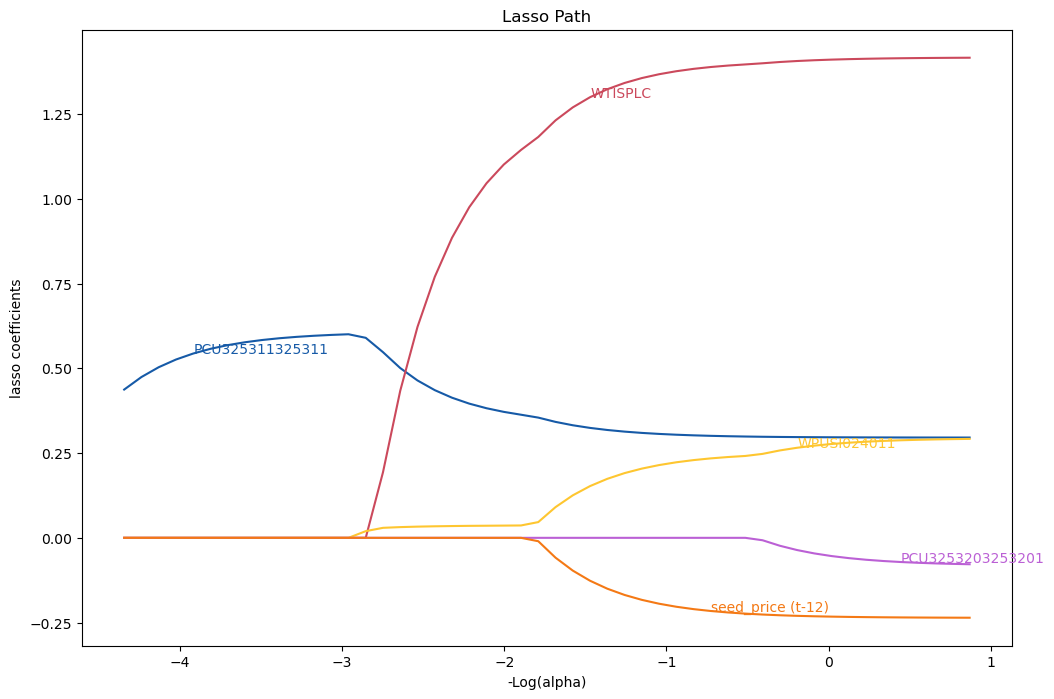

In [91]:
lasso_model = linear_model.Lasso() #identifying the variables that have the biggest impact on MSE, and therefore informing us which variables to regress if we're not using them all
lasso_model.fit(X, y)
lasso_model.coef_

from itertools import cycle
alphas = np.exp(np.linspace(10, -2, 50))
alphas, coefs_lasso, _ = linear_model.lasso_path(X, y, alphas=alphas, max_iter=10000)

colors = ['#165aa7', '#cb495c', '#fec630', '#bb60d5', '#f47915']

# plotting
fig, ax = plt.subplots(figsize=(12, 8))
color_cycle = cycle(colors)
log_alphas = -np.log10(alphas)
for coef_l, c, name in zip(coefs_lasso, color_cycle, list(X)):
   ax.plot(log_alphas, coef_l, c=c)
   ax.set_xlabel('-Log(alpha)')
   ax.set_ylabel('lasso coefficients')
   ax.set_title('Lasso Path')
   ax.axis('tight')
   maxabs = np.max(np.abs(coef_l))
   i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
   xnote = log_alphas[i]
   ynote = coef_l[i]
   ax.annotate(name, (xnote, ynote), color=c)

print(lasso_model.coef_)
print(X)